In [ ]:
#Install required packages
!pip install numpy pandas

#check the current path
import os
print(os.getcwd())

#Lists the files in the current directory
!ls

/content
Data  drive


In [ ]:
import pandas as pd
import numpy as np

#Define the fiele paths
Folder_path = 'Data/Moisture/T_102224/'
File_paths = ['ASP-1.CSV','ASP-2.CSV','ASP-3.CSV','ASP-4.CSV','ASP-5.CSV','ASP-6.CSV','ASP-7.CSV']
MC_data = np.array([0, 2.03, 2.88, 4.83, 5.07, 7.23, 9.53])

#define the baseline path and read data
B_path = Folder_path+File_paths[0]
data_B = pd.read_csv(B_path, skiprows=4)
data_B.drop([len(data_B)-1], inplace=True)
print(data_B.head())
print('------------------------------------------')
print(data_B.columns)

         Frequency(Hz)   R(Ohm)-data   X(Ohm)-data
0  +2.00000000000e+001 -5.552962e+07 -3.991724e+08
1  +1.26997500000e+003  2.924204e+05 -8.636002e+06
2  +2.51995000000e+003  1.613722e+05 -4.384120e+06
3  +3.76992500000e+003  1.009101e+05 -2.956232e+06
4  +5.01990000000e+003  7.012538e+04 -2.231389e+06
------------------------------------------
Index(['Frequency(Hz)', ' R(Ohm)-data', ' X(Ohm)-data'], dtype='object')


### Impedance and Admittance Calculations

Impedance $Z$ is a complex number that describes the opposition to alternating current in a circuit, composed of both real and imaginary components:

$$Z = R + jX$$

Where:
- $R$ is the **real part** of impedance, also called **resistance** (Ohms),
- $X$ is the **imaginary part** of impedance, also called **reactance** (Ohms),
- $j$ is the imaginary unit ($j^2 = -1$).

The impedance data you have consists of:
- **Frequency (Hz)**: The frequency at which the measurement was made,
- **$R$ (Ohms)**: The real component of impedance,
- **$X$ (Ohms)**: The imaginary component of impedance.

### Conversion to Conductance, Susceptance, and Phase Angle

The reciprocal of impedance is called **Admittance** $Y$, which also has real and imaginary parts:

$$Y = \frac{1}{Z} = G + jB$$

Where:
- $G$ is the **conductance** (Siemens), the real part of admittance,
- $B$ is the **susceptance** (Siemens), the imaginary part of admittance.

#### Conductance ($G$) and Susceptance ($B$) Formulas

You can calculate conductance and susceptance from impedance using the following equations:

$$G = \frac{R}{R^2 + X^2}$$

$$B = -\frac{X}{R^2 + X^2}$$

Where:
- $R$ is the real impedance (Ohms),
- $X$ is the imaginary impedance (Ohms).

#### Phase Angle ($\theta$) Formula

The **phase angle** $\theta$ represents the angle between the impedance vector and the real axis, and it is calculated as:

$$\theta = \arctan\left(\frac{X}{R}\right)$$

Where:
- $\theta$ is the phase angle (radians),
- $X$ is the imaginary impedance,
- $R$ is the real impedance.

You can also convert the phase angle to degrees:

$$\theta_{\text{degrees}} = \theta \times \left(\frac{180}{\pi}\right)$$

### Summary of Key Concepts

- **Real Impedance $R$**: The resistive part of impedance, which dissipates energy.
- **Imaginary Impedance $X$**: The reactive part of impedance, which stores and releases energy.
- **Conductance $G$**: The real part of admittance, indicating how easily current flows through the circuit.
- **Susceptance $B$**: The imaginary part of admittance, indicating how easily the circuit stores and releases energy.
- **Phase Angle $\theta$**: The angle between the impedance vector and the real axis, describing the relationship between resistive and reactive components.


In [ ]:
#Frequency range cut down
col = data_B.columns #get the column name
freq_list = data_B[col[0]] # get the data for the frequency
freq_list = freq_list.astype(float) # change the data type to float
print(freq_list)
print('------------------------------------------')

#define the desired frequency range
start_freq =1e4
end_freq = 1e5

#find the cloest position
start_freq_cand = np.abs(start_freq - np.array(freq_list))
end_freq_cand = np.abs(end_freq - np.array(freq_list))
pos_1 = np.where(start_freq_cand==np.min(start_freq_cand))[0][0]
pos_2 = np.where(end_freq_cand==np.min(end_freq_cand))[0][0]
freq = np.array(freq_list[pos_1:pos_2+1].astype(float))
freq = freq.reshape(-1,1)

print(min(freq),max(freq))


0           20.000
1         1269.975
2         2519.950
3         3769.925
4         5019.900
          ...     
796     995000.100
797     996250.075
798     997500.050
799     998750.025
800    1000000.000
Name: Frequency(Hz), Length: 801, dtype: float64
------------------------------------------
[10019.8] [100018.]


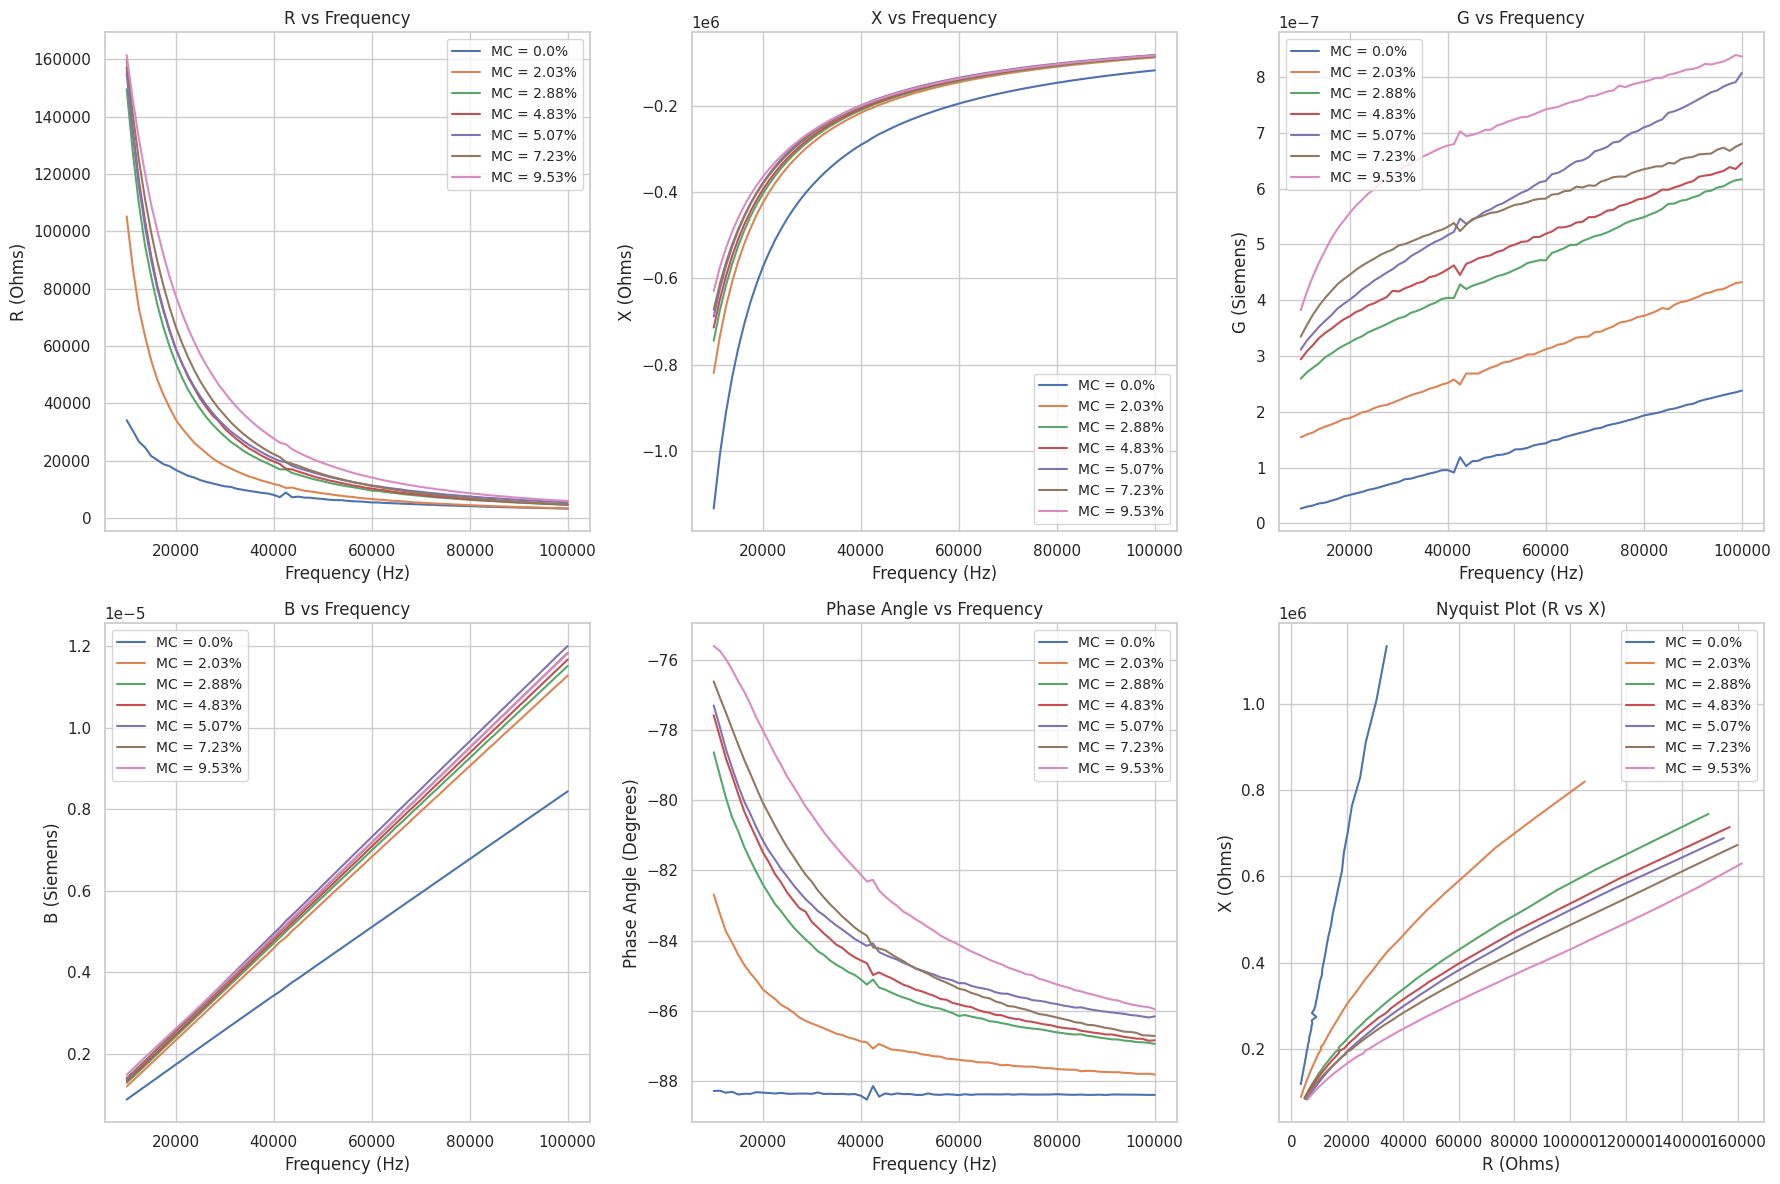

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme for aesthetics
sns.set(style="whitegrid")

# Set up figure and subplots with 3 columns and 2 rows
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

MC_list = []
j = 0

for i in File_paths:
    temp_path = Folder_path + i
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data.drop([len(temp_data) - 1], inplace=True)
    temp_data = temp_data.astype(float)
    col = temp_data.columns
    MC_list.append(MC_data[j])
    R = np.array(temp_data[col[1]])
    R = R[pos_1:pos_2 + 1].astype(float)
    X = np.array(temp_data[col[2]])
    X = X[pos_1:pos_2 + 1].astype(float)

    # Calculate conductance and susceptance
    G = R / (R**2 + X**2)
    B = -X / (R**2 + X**2)

    # Calculate phase angle
    theta = np.arctan(X / R)
    theta_deg = theta * 180 / np.pi

    # Plot each subplot
    # 1. R vs Frequency
    axs[0, 0].plot(freq, R, marker='', linestyle='-', label="MC = " + str(MC_list[j]) + "%")
    axs[0, 0].set_title("R vs Frequency")
    axs[0, 0].set_xlabel("Frequency (Hz)")
    axs[0, 0].set_ylabel("R (Ohms)")

    # 2. X vs Frequency
    axs[0, 1].plot(freq, X, marker='', linestyle='-', label="MC = " + str(MC_list[j]) + "%")
    axs[0, 1].set_title("X vs Frequency")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("X (Ohms)")

    # 3. G vs Frequency
    axs[0, 2].plot(freq, G, marker='', linestyle='-', label="MC = " + str(MC_list[j]) + "%")
    axs[0, 2].set_title("G vs Frequency")
    axs[0, 2].set_xlabel("Frequency (Hz)")
    axs[0, 2].set_ylabel("G (Siemens)")

    # 4. B vs Frequency
    axs[1, 0].plot(freq, B, marker='', linestyle='-', label="MC = " + str(MC_list[j]) + "%")
    axs[1, 0].set_title("B vs Frequency")
    axs[1, 0].set_xlabel("Frequency (Hz)")
    axs[1, 0].set_ylabel("B (Siemens)")

    # 5. Phase Angle vs Frequency
    axs[1, 1].plot(freq, theta_deg, marker='', linestyle='-', label="MC = " + str(MC_list[j]) + "%")
    axs[1, 1].set_title("Phase Angle vs Frequency")
    axs[1, 1].set_xlabel("Frequency (Hz)")
    axs[1, 1].set_ylabel("Phase Angle (Degrees)")

    # 6. Nyquist Plot (R vs X)
    axs[1, 2].plot(R, np.abs(X), marker='', linestyle='-', label="MC = " + str(MC_list[j]) + "%")
    axs[1, 2].set_title("Nyquist Plot (R vs X)")
    axs[1, 2].set_xlabel("R (Ohms)")
    axs[1, 2].set_ylabel("X (Ohms)")

    j += 1

# Adjust layout and set legend
for ax in axs.flat:
    ax.legend(loc="best", fontsize=10)
    ax.grid(True)

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()

### RMSD Calculation (Percentage)

The **Root Mean Square Deviation (RMSD)** in percentage form is calculated using the following formula:

$$
\text{RMSD} (\%) = \sqrt{ \frac{ \sum_{i=1}^{N} (G_i - G_{\text{bl}})^2 }{ \sum_{i=1}^{N} (G_{\text{bl}})^2 } }
$$

Where:
- $G_i$ is the value from the test data (e.g., $R$ values),
- $G_{\text{bl}}$ is the baseline value (e.g., baseline $R$),
- $N$ is the total number of data points.

This formula compares the difference between the data values and the baseline values, normalizes it by the baseline values, and expresses the result as a percentage.

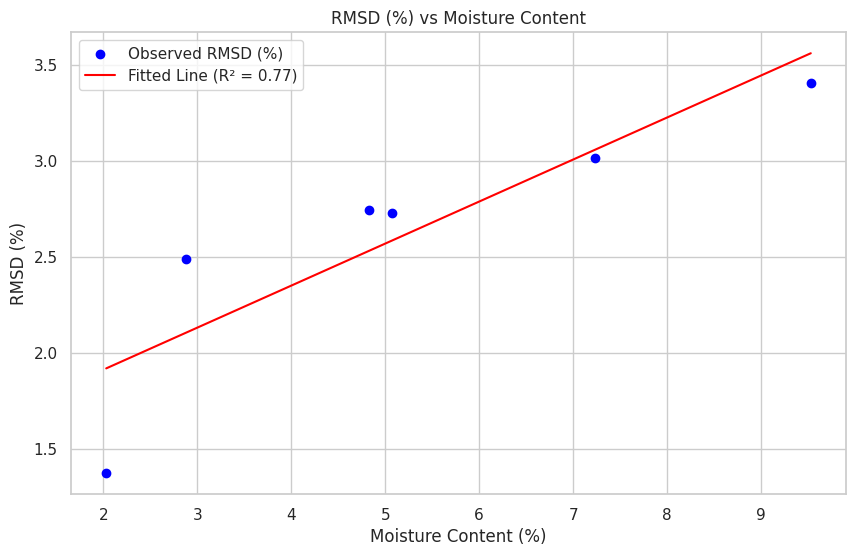

Regression Coefficient (Slope): 0.21884120948670896
Regression Intercept: 1.4761276718603995
R²: 0.77


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set up seaborn theme for aesthetics
sns.set(style="whitegrid")

# Baseline data (use your existing code for reading in data)
R_baseline = np.array(data_B[col[1]])[pos_1:pos_2+1].astype(float)

RMSD_percent_list = []

# Loop through the other CSV files
for i in range(1, len(File_paths)):
    temp_path = Folder_path + File_paths[i]
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data.drop([len(temp_data)-1], inplace=True)
    temp_data = temp_data.astype(float)
    R_temp = np.array(temp_data[col[1]])[pos_1:pos_2+1].astype(float)

    # Calculate RMSD (%)
    numerator = np.sum((R_temp - R_baseline) ** 2)
    denominator = np.sum(R_baseline ** 2)
    rmsd_percent = np.sqrt(numerator / denominator)
    RMSD_percent_list.append(rmsd_percent)

# Convert to numpy array for further processing
RMSD_percent_array = np.array(RMSD_percent_list)

# Perform linear regression between MC_data (excluding the baseline) and RMSD percentage values
MC_data_non_baseline = MC_data[1:]  # Remove the baseline MC value (0%)
model = LinearRegression()
MC_data_non_baseline = MC_data_non_baseline.reshape(-1, 1)
model.fit(MC_data_non_baseline, RMSD_percent_array)

# Get the regression line values
RMSD_pred = model.predict(MC_data_non_baseline)

# Calculate R-squared (R²)
r_squared = r2_score(RMSD_percent_array, RMSD_pred)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(MC_data_non_baseline, RMSD_percent_array, color='blue', label='Observed RMSD (%)')
plt.plot(MC_data_non_baseline, RMSD_pred, color='red', label=f'Fitted Line (R² = {r_squared:.2f})')
plt.title('RMSD (%) vs Moisture Content')
plt.xlabel('Moisture Content (%)')
plt.ylabel('RMSD (%)')
plt.legend()
plt.grid(True)
plt.show()

# Print regression coefficient and intercept
print(f"Regression Coefficient (Slope): {model.coef_[0]}")
print(f"Regression Intercept: {model.intercept_}")
print(f"R²: {r_squared:.2f}")


### Analysis of Results

The plot above shows the relationship between RMSD (%) and Moisture Content (MC %). The blue points represent the observed RMSD values for each moisture content, and the red line represents the linear regression fit. From the plot, we can infer the trend between RMSD and moisture content.

The calculated linear regression gives the following values:
- **Regression Coefficient (Slope)**: This represents the rate at which RMSD changes as moisture content increases.
- **Regression Intercept**: This represents the RMSD when the moisture content is zero.

These values help quantify the relationship between the impedance deviation (RMSD) and the moisture content in the materials under test.


### Nyquist Plot and Equivalent Circuit Model

#### Nyquist Plot

A **Nyquist plot** is a graphical representation of the impedance of an electrochemical system, commonly used in **Electrochemical Impedance Spectroscopy (EIS)**. The plot shows the relationship between the real and imaginary components of impedance:

- The x-axis represents the **real part of impedance** ($Z'$, R in our case).
- The y-axis represents the **imaginary part of impedance** ($Z''$, X in our case).
- In a Nyquist plot, each point corresponds to the impedance at a different frequency. **High frequencies** are found on the left, and **low frequencies** are on the right.
  
The shape of a typical Nyquist plot consists of semicircles or arcs. The **diameter** of the semicircle corresponds to the **charge transfer resistance** ($R_{ct}$), and deviations from a perfect semicircle often indicate non-ideal capacitive behavior or other electrochemical processes.

#### Equivalent Circuit Model

An **equivalent circuit model** simplifies the impedance of an electrochemical system using common electrical elements like resistors, capacitors, and constant phase elements (CPEs). These models are used to extract important electrochemical parameters by fitting the impedance data.

One common model is the **R-CPE model** (Resistor and Constant Phase Element). The **CPE** is used to model systems that deviate from ideal capacitive behavior, often due to surface roughness or distributed time constants.

The impedance of a **CPE** is given by:

$$
Z_{\text{CPE}} = \frac{1}{Q(j\omega)^\alpha}
$$

Where:
- $Q$ is the **CPE constant** (analogous to capacitance),
- $j$ is the imaginary unit ($j^2 = -1$),
- $\omega$ is the angular frequency ($\omega = 2\pi f$),
- $\alpha$ is the **CPE exponent** ($0 \leq \alpha \leq 1$), which indicates the deviation from ideal capacitive behavior (with $\alpha = 1$ for an ideal capacitor).

#### R-CPE Circuit Model

For an **R-CPE parallel circuit**, the total impedance is given by:

$$
Z_{\text{total}} = R_s + \left( \frac{1}{\frac{1}{R_p} + \frac{1}{Z_{\text{CPE}}}} \right)
$$

Where:
- $R_s$ is the **solution resistance** (series resistance),
- $R_p$ is the **parallel resistance** (often representing charge transfer resistance),
- $Z_{\text{CPE}}$ is the impedance of the constant phase element.

Expanding the formula for $Z_{\text{CPE}}$ gives the full equation:

$$
Z_{\text{total}} = R_s + \frac{1}{\frac{1}{R_p} + (Q(j\omega)^\alpha)}
$$

This model is commonly used to fit data in a Nyquist plot. The semicircular shape often seen in Nyquist plots corresponds to the charge transfer resistance and capacitance (or CPE) in the system. The shape of the semicircle can provide insights into the properties of the electrochemical system, such as charge transfer resistance and deviations from ideal capacitive behavior.


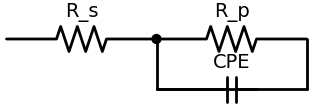

In [ ]:
import schemdraw
import schemdraw.elements as elm

# Create a new drawing for the R-CPE circuit
with schemdraw.Drawing() as d:

    # Step 1: Draw the series resistor Rs
    d += elm.Resistor().right().label('R_s')  # Rs (Series resistor)

    # Create a node for the parallel circuit
    d += elm.Dot()

    # Step 2: Draw the parallel branch with Rp
    d.push()  # Save current position for the parallel branch
 # Create horizontal line for parallel branch
    d += elm.Resistor().label('R_p')  # Rp (Parallel resistor)
    d.pop()  # Go back to the saved node position

    # Step 3: Draw the parallel branch with CPE
    d += elm.Line().down().length(1)  # Vertical line for the CPE branch
    d += elm.Capacitor().right().label('CPE')  # CPE (Constant Phase Element)

    # Step 4: Close the parallel branches by connecting Rp and CPE
    d += elm.Line().up().length(1)  # Close the CPE branch upwards to meet Rp branch

    # Step 5: Complete the circuit
    d += elm.Line().right().at([3, -1]).length(2)  # Horizontal line to finish the circuit

    # Display the drawing
    d.draw()


In [ ]:
!pip install PyEIS lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


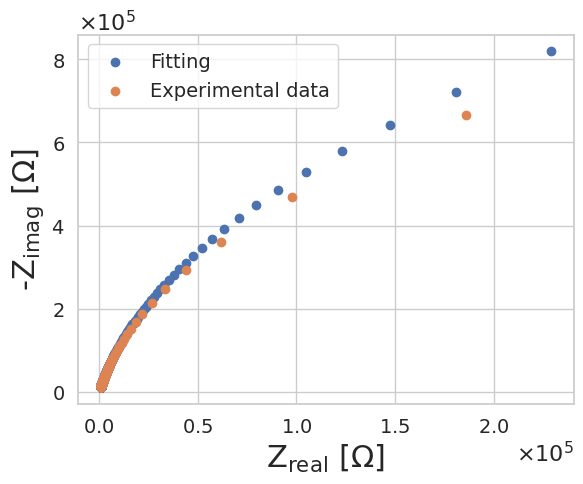

In [ ]:
# performs manual fitting of experimentally measured electrochemical impedance spectroscopy (EIS)
# Import necessary libraries
from scipy.ndimage import gaussian_filter
from PyEIS import *  # Import the necessary EIS (Electrochemical Impedance Spectroscopy) tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path for the CSV data and frequency range for analysis
csv_name = 'Data/Moisture/27-5.CSV'  # CSV file containing experimental data
start_freq = 1e4  # Starting frequency for the fitting and data range (10^4 Hz)
end_freq = 1e6   # Ending frequency for the fitting and data range (10^6 Hz)

# Generate frequency range for the equivalent circuit model fitting
f_range = np.arange(start_freq, end_freq, 1600)  # Frequency range (step size 1600 Hz)

# Define the equivalent circuit model (Rs-RQ circuit model with parallel RQ branch)
# Rs: Series resistance, R: Resistance in parallel with Q, n: CPE exponent, Q: CPE constant
RSRQ_example = cir_RsRQ(w=f_range, Rs=10, R=4.1e6, n=0.959, Q=1.655e-10)

# Plot the model fitting data (real part vs. imaginary part)
plt.scatter(RSRQ_example.real, -RSRQ_example.imag, label='Fitting')  # Plot the fitted data from the model

# Load the raw experimental data from the CSV file
Raw_data = pd.read_csv(csv_name, skiprows=5)  # Skip the first 5 rows which might contain headers or metadata
Raw_data.drop([len(Raw_data) - 1], inplace=True)  # Drop the last row if it's incomplete or irrelevant

# Extract the frequency, real impedance (Z_real), and imaginary impedance (Z_img) columns
col = Raw_data.columns  # Get column names
freq = Raw_data[col[0]]  # Get the frequency column
freq_list = freq.astype(float)  # Convert frequency data to float type for calculations

# Find the closest indices to the desired start and end frequencies
start_freq_cand = np.abs(start_freq - np.array(freq_list))  # Calculate differences to find the closest start frequency
end_freq_cand = np.abs(end_freq - np.array(freq_list))  # Calculate differences to find the closest end frequency
pos_1 = np.where(start_freq_cand == np.min(start_freq_cand))[0][0]  # Get the index of the closest start frequency
pos_2 = np.where(end_freq_cand == np.min(end_freq_cand))[0][0]  # Get the index of the closest end frequency

# Slice the frequency, real impedance, and imaginary impedance data for the selected range
freq = freq[pos_1:pos_2 + 1].astype(float)  # Filter the frequency data in the specified range
z_real = Raw_data[col[1]][pos_1:pos_2 + 1].astype(float)  # Extract and filter the real impedance data
z_img = np.abs(Raw_data[col[2]][pos_1:pos_2 + 1].astype(float))  # Extract and filter the imaginary impedance data

# Plot the raw experimental data (real vs. imaginary impedance)
plt.scatter(z_real, z_img, linestyle='-', label="Experimental data")  # Plot the experimental impedance data

# Set plot labels and formatting
plt.xlabel('Z$_{real}$ [$\Omega$]')  # Label for the x-axis (Real part of impedance)
plt.ylabel('-Z$_{imag}$ [$\Omega$]')  # Label for the y-axis (Imaginary part of impedance)
plt.xticks(fontsize=14)  # Set x-axis tick label font size
plt.yticks(fontsize=14)  # Set y-axis tick label font size
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0), useMathText=True)  # Use scientific notation for both axes
plt.axis('tight')  # Ensure the axes fit tightly around the data points
plt.legend(loc='best')  # Place the legend in the best location based on available space

# Display the final Nyquist plot with both the model fitting and experimental data
plt.show()


Fitting finished
Best-fit parameters: R = 4000000.0, Q = 1.65e-10, alpha = 0.959


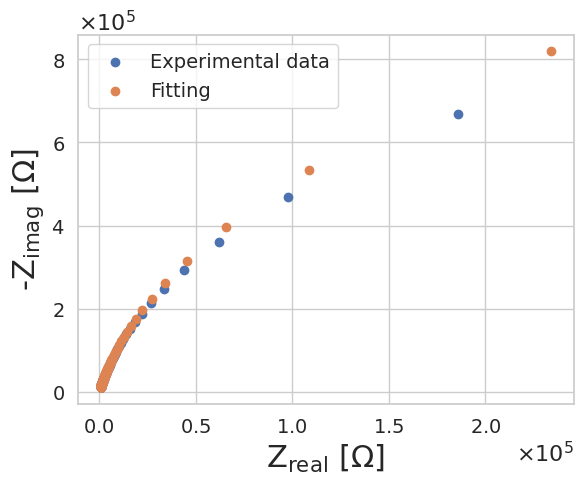

In [ ]:
# Import necessary libraries
from scipy.ndimage import gaussian_filter  # For data smoothing if needed
from PyEIS import *  # Import the PyEIS library for equivalent circuit model fitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the frequency range for the experimental data and model fitting
start_freq = 1e4  # Starting frequency (10^4 Hz)
end_freq = 1e6  # Ending frequency (10^6 Hz)

# Define candidate parameter ranges for the circuit model (Rs, Q, alpha)
RS_list = np.arange(1e6, 5e6, 1e6)  # Range of possible Rs values (solution resistance)
Q_list = np.arange(1.6e-10, 1.7e-10, 5e-12)  # Range of possible Q values (CPE parameter)
A_list = np.arange(0.95, 0.96, 0.001)  # Range of possible alpha values (CPE exponent)

# Define the frequency range to simulate the model
f_range = np.arange(start_freq, end_freq, 6250)  # Frequency range for the simulation with step size of 6250 Hz

# Plot the experimental data (Nyquist plot)
plt.scatter(z_real, z_img, linestyle='-', label="Experimental data")  # Plot the experimental real vs. imaginary impedance

# Initialize error storage for best fit tracking
error_stor = 1e20  # Set a high initial value for error to find the minimum

# Start grid search over the Rs, Q, and alpha parameters to find the best fit
for i in RS_list:  # Loop through possible Rs values
    for j in Q_list:  # Loop through possible Q values
        for k in A_list:  # Loop through possible alpha values
            # Simulate the equivalent circuit model for each parameter combination
            RSRQ_example = cir_RsRQ(w=f_range, Rs=10, R=i, n=k, Q=j)
            sim_real = np.array(RSRQ_example.real)  # Extract real part of the simulated impedance
            sim_imag = np.array(-RSRQ_example.imag)  # Extract imaginary part of the simulated impedance

            # Calculate relative error between simulated and experimental data
            r_error = np.abs(sim_real - z_real) / z_real  # Relative error for the real part
            i_error = np.abs(sim_imag - z_img) / z_img  # Relative error for the imaginary part

            # Average the error across both real and imaginary parts
            temp_err = np.average(r_error + i_error)  # Compute total error

            # Update the best fit if the current combination has lower error
            if temp_err < error_stor:
                error_stor = temp_err  # Update stored error
                zs_real = sim_real  # Store best-fit real impedance
                zs_img = sim_imag  # Store best-fit imaginary impedance
                best_R = i  # Store best-fit R value
                best_Q = j  # Store best-fit Q value
                best_alpha = k  # Store best-fit alpha value

# Plot the best-fit simulated data on top of experimental data
plt.scatter(zs_real, zs_img, label='Fitting')  # Plot the best-fitting model

# Print the fitted equivalent circuit parameters
print('Fitting finished')
print(f"Best-fit parameters: R = {best_R}, Q = {best_Q}, alpha = {best_alpha}")

# Set plot labels and formatting
plt.xlabel('Z$_{real}$ [$\Omega$]')  # Label for the x-axis (Real impedance)
plt.ylabel('-Z$_{imag}$ [$\Omega$]')  # Label for the y-axis (Imaginary impedance)
plt.xticks(fontsize=14)  # Set x-axis tick label font size
plt.yticks(fontsize=14)  # Set y-axis tick label font size
plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0), useMathText=True)  # Use scientific notation for both axes
plt.axis('tight')  # Tighten the axes to fit data
plt.legend(loc='best')  # Place the legend in the best location
plt.show()  # Display the Nyquist plot with the experimental and fitted data


### Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a widely used dimensionality reduction technique. It transforms the original dataset into a new set of variables called **principal components** (PCs), which are linear combinations of the original features. PCA maximizes the variance in the data while keeping the components orthogonal to each other. This helps in reducing the dimensionality of the data while preserving most of the information.

#### 1. Centering the Data:
To perform PCA, the first step is to center the data by subtracting the mean of each feature:
$X_{\text{centered}} = X - \mu$
where $X$ is the original data matrix and $\mu$ is the mean vector of the features.

#### 2. Covariance Matrix:
The covariance matrix $C$ is computed from the centered data to understand how features vary together:
$$
C = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$
where $X_{\text{centered}}$ is the centered data matrix and $n$ is the number of samples.

#### 3. Eigenvalue Decomposition:
To extract the principal components, we compute the eigenvectors and eigenvalues of the covariance matrix:
$$
C v_i = \lambda_i v_i
$$
where $\lambda_i$ are the eigenvalues and $v_i$ are the eigenvectors (principal components). The eigenvalue $\lambda_i$ represents the variance captured by the corresponding eigenvector $v_i$.

#### 4. Principal Components:
The original data is projected onto the principal components to obtain the transformed data:
$Z = X_{\text{centered}} V$
where $V$ is the matrix of eigenvectors. The matrix $Z$ contains the data transformed into the new principal component space.

#### 5. Explained Variance Ratio:
The explained variance ratio of each principal component is calculated by dividing the corresponding eigenvalue by the sum of all eigenvalues:
$$
\text{Explained Variance Ratio} = \frac{\lambda_i}{\sum_{i=1}^{p} \lambda_i}
$$
where $\lambda_i$ is the eigenvalue of the $i$-th principal component and $p$ is the total number of components.

#### 6. PCA Interpretation:
- The first principal component (PC1) captures the maximum variance in the data.
- Each subsequent component captures the maximum variance in the remaining directions, while being orthogonal to the previous components.
- The percentage of variance explained by each component helps to understand the relative importance of each component in describing the data structure.

#### Summary:
PCA is widely used in data analysis to reduce dimensionality and visualize high-dimensional data in a lower-dimensional space while retaining most of the variance. The explained variance ratio provides insights into how much information each principal component carries from the original data.

(7, 2)
Explained variance by PC1: 86.38%
Explained variance by PC2: 10.31%


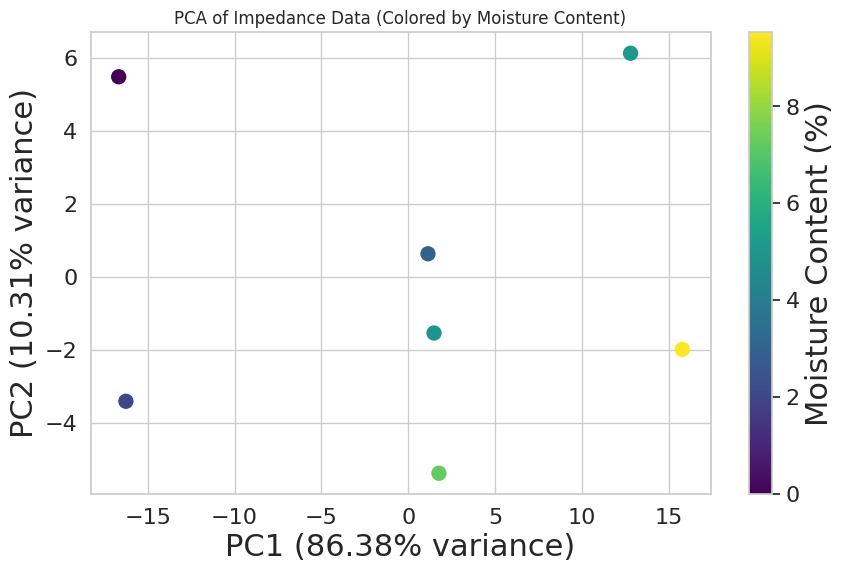

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Define whether to analyze 'R' (real part) or 'X' (imaginary part) by changing this variable
analyze_real_part = True  # Set to True for R (real), False for X (imaginary)

# Create a list to store the data from all CSV files
data_list = []

# Loop through all CSV files and extract R or X values
for i in range(0, len(File_paths)):
    temp_path = Folder_path + File_paths[i]
    temp_data = pd.read_csv(temp_path, skiprows=4)
    col = temp_data.columns
    temp_data.drop([len(temp_data)-1], inplace=True)
    temp_data = temp_data.astype(float)

    if analyze_real_part:
        R_temp = np.array(temp_data[col[1]])[pos_1:pos_2+1].astype(float)  # Real part (R)
        data_list.append(R_temp)
    else:
        X_temp = np.array(temp_data[col[2]])[pos_1:pos_2+1].astype(float)  # Imaginary part (X)
        data_list.append(X_temp)

# Convert the data list into a DataFrame for PCA
data_array = np.array(data_list).T
data_scaled = StandardScaler().fit_transform(data_array.T)  # Standardize the data

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
print(pca_result.shape)
# Explained variance ratio (percentage)
explained_variance = pca.explained_variance_ratio_ * 100
print(f"Explained variance by PC1: {explained_variance[0]:.2f}%")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}%")

# Scatter plot with color based on MC_data
MC_data_non_baseline = MC_data  # Using the full moisture content data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=MC_data_non_baseline, cmap='viridis', s=100)
plt.colorbar(scatter, label='Moisture Content (%)')
plt.xlabel(f'PC1 ({explained_variance[0]:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}% variance)')
plt.title('PCA of Impedance Data (Colored by Moisture Content)')
plt.grid(True)
plt.show()

### Piezoelectric Materials' Impedance Spectroscopy

**Piezoelectric materials** exhibit peaks in impedance spectroscopy due to their mechanical resonance and anti-resonance behavior. These materials can convert mechanical energy into electrical energy and vice versa. When an alternating electric field (AC voltage) is applied to a piezoelectric material, it undergoes mechanical vibrations.

- **Resonance** occurs when the applied AC frequency matches the natural mechanical vibration frequency of the material. At resonance, the impedance drops to a minimum because energy is efficiently transferred to mechanical motion.
- **Anti-resonance** occurs when the frequency slightly exceeds the resonant frequency, creating a phase shift between the mechanical and electrical response, leading to a peak in the impedance.

This behavior is observed as distinct peaks or dips in the **Nyquist plot** during impedance spectroscopy.

### Converting Impedance to Dielectric Constant

The **dielectric constant** (relative permittivity), denoted by $ \varepsilon_r $, characterizes the ability of a material to store electrical energy in an electric field. From impedance spectroscopy, the dielectric constant can be calculated based on the **capacitance** derived from impedance measurements.

#### 1. Impedance of a Capacitor:
The impedance of a capacitor is related to the capacitance $ C $ by the following equation:
$$
Z = \frac{1}{j\omega C}
$$
where:
- $ Z $ is the impedance,
- $ \omega = 2\pi f $ is the angular frequency,
- $ C $ is the capacitance.

#### 2. Relationship between Capacitance and Dielectric Constant:
The capacitance $ C $ of a piezoelectric material can be expressed as:
$$
C = \varepsilon_r \varepsilon_0 \frac{A}{d}
$$
where:
- $ \varepsilon_r $ is the **relative dielectric constant** (the quantity we want to calculate),
- $ \varepsilon_0 $ is the **vacuum permittivity**, $ \varepsilon_0 = 8.854 \times 10^{-12} \, \text{F/m} $,
- $ A $ is the electrode area,
- $ d $ is the thickness of the piezoelectric material.

#### 3. Solving for the Dielectric Constant:
Rearranging the capacitance equation to solve for $ \varepsilon_r $:
$$
\varepsilon_r = \frac{C d}{\varepsilon_0 A}
$$
Thus, by calculating the capacitance from impedance spectroscopy, the dielectric constant $ \varepsilon_r $ can be determined.

### Why Piezoelectric Materials are Dielectric

Piezoelectric materials are also **dielectric materials** because they can store electrical energy when subjected to an electric field. This dielectric behavior arises due to the polarization of bound charges in the material when an electric field is applied.

In addition to being dielectric, piezoelectric materials possess the unique ability to convert mechanical energy into electrical energy, thanks to their crystal structure, which lacks a center of inversion symmetry. This makes piezoelectric materials both dielectric and piezoelectric.

#### Summary:
- **Dielectric behavior**: Piezoelectric materials can polarize and store charge under an applied electric field, similar to capacitors.
- **Piezoelectric behavior**: These materials also generate an electrical charge in response to mechanical stress, due to their crystal symmetry.

Thus, piezoelectric materials are not only dielectric but also exhibit unique piezoelectric properties that allow them to interconvert mechanical and electrical energy.


### Piezoelectric Coupling Effect

The **piezoelectric coupling effect** describes how mechanical strain and electric displacement interact in piezoelectric materials. This effect enables a piezoelectric material to function as both an actuator and a sensor. The fundamental equations governing the piezoelectric coupling effect are:

#### 1. Direct Piezoelectric Effect
In the **direct piezoelectric effect**, mechanical stress generates an electric displacement:
$D_i = d_{ij} \sigma_j + \varepsilon_{ij} E_j$
Where:
- $D_i$ is the electric displacement,
- $d_{ij}$ is the piezoelectric strain coefficient (electromechanical coupling constant),
- $\sigma_j$ is the mechanical stress,
- $\varepsilon_{ij}$ is the dielectric permittivity,
- $E_j$ is the electric field.

#### 2. Converse Piezoelectric Effect
In the **converse piezoelectric effect**, an applied electric field generates a mechanical strain:
$S_i = s_{ij} \sigma_j + d_{ij} E_j$
Where:
- $S_i$ is the mechanical strain,
- $s_{ij}$ is the compliance coefficient,
- $\sigma_j$ is the mechanical stress,
- $E_j$ is the electric field,
- $d_{ij}$ is the piezoelectric coupling coefficient.

These two equations illustrate the coupling between the mechanical and electrical domains in piezoelectric materials, making them useful in electromechanical impedance (EMI) applications for structural health monitoring (SHM).

---

### Electromechanical Impedance (EMI) Equation

The **electromechanical impedance (EMI)** technique uses the coupling between electrical and mechanical domains in piezoelectric materials to monitor changes in structural properties. The admittance $Y$, which is the reciprocal of impedance, can be expressed as a function of conductance $G$ and susceptance $B$ for a piezoelectric material like PZT. The theoretical admittance model for PZT is given by:

$$
Y = G + Bj = 4\omega \frac{l^2}{h} \left[ \frac{\varepsilon_{33}^T - 2d_{31}^2 Y^E}{(1 - \nu)} + 2d_{31}^2 Y^E \left( \frac{Z_a}{Z_a + Z_s} \right) \text{tan} (kl) \right]
$$

Where:
- $G$ is the conductance,
- $B$ is the susceptance,
- $j$ is the imaginary unit,
- $\omega$ is the angular frequency,
- $l, h$ are the PZT sensor dimensions (width and height),
- $\varepsilon_{33}^T$ is the electrical permittivity,
- $d_{31}$ is the piezoelectric coefficient,
- $Y^E$ is the dynamic Young's modulus,
- $\nu$ is Poisson's ratio,
- $Z_a$ and $Z_s$ are the mechanical impedances of the PZT and the structure, respectively,
- $k$ is the wavenumber.

### Explanation:

- The admittance $Y$ is the sum of the conductance $G$ (real part) and the susceptance $B$ (imaginary part).
- The admittance model is influenced by the mechanical impedance of both the PZT sensor and the structure to which it is attached.
- The function includes terms related to the piezoelectric effect (via $d_{31}$) and the mechanical properties of the system (through $Y^E$, $Z_a$, and $Z_s$).
- The term $\text{tan}(kl)$ accounts for wave propagation effects in the PZT.

This equation is commonly used to describe the electromechanical behavior of piezoelectric materials in **EMI-based structural health monitoring (SHM)** applications.

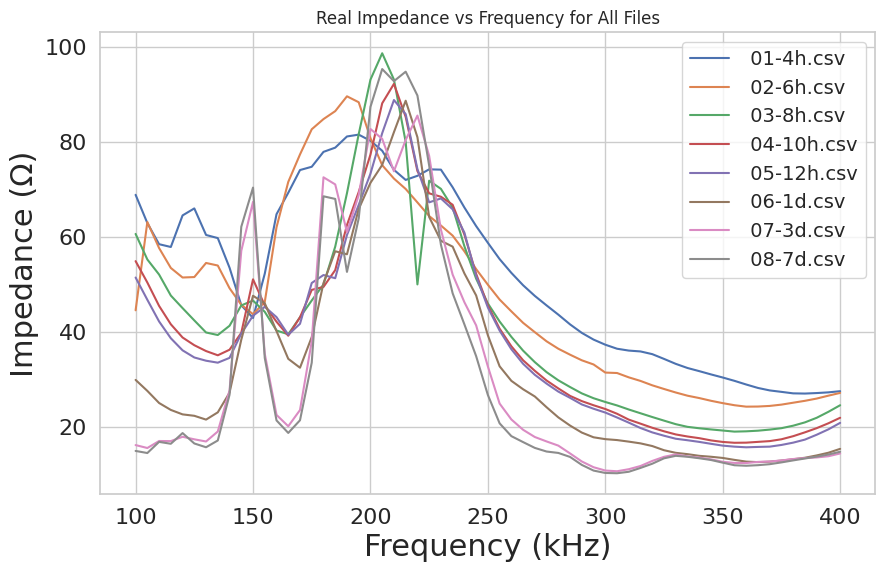

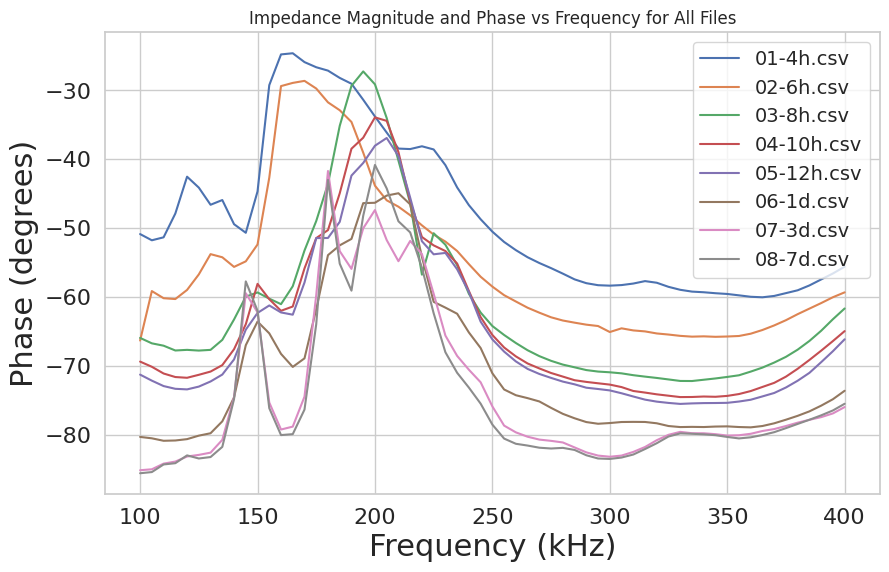

In [ ]:
# Define the folder and file paths
EMI_folder = 'Data/EMI-piezo/'
EMI_paths = ['01-4h.csv', '02-6h.csv', '03-8h.csv', '04-10h.csv', '05-12h.csv', '06-1d.csv', '07-3d.csv', '08-7d.csv']

# Define the desired frequency range (in kHz)
start_freq_kHz = 10  # Start frequency (kHz)
end_freq_kHz = 400  # End frequency (kHz)

# Initialize a plot for impedance real and imaginary parts
plt.figure(figsize=(10, 6))

# Loop through all the file paths and read the data
for i, file_name in enumerate(EMI_paths):
    temp_path = EMI_folder + file_name
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data = temp_data.astype(float)  # Ensure all data is float type

    # Extract columns based on their names
    col = temp_data.columns
    Freq_MHz = np.array(temp_data[col[0]])  # Frequency in MHz
    Freq_kHz = Freq_MHz * 1000  # Convert frequency from MHz to kHz

    # Extract other columns (assuming consistent column names)
    R = np.array(temp_data[col[2]])  # Real part of impedance
    X = np.array(temp_data[col[3]])  # Imaginary part of impedance
    Zmag = np.array(temp_data[col[4]])  # Magnitude of impedance
    phase_EMI = np.array(temp_data[col[5]])  # Phase angle of impedance

    # Find the indices that correspond to the desired frequency range
    freq_mask = (Freq_kHz >= start_freq_kHz) & (Freq_kHz <= end_freq_kHz)

    # Apply the mask to filter the data within the specified frequency range
    Freq_filtered = Freq_kHz[freq_mask]
    R_filtered = R[freq_mask]
    X_filtered = X[freq_mask]
    Zmag_filtered = Zmag[freq_mask]
    phase_filtered = phase_EMI[freq_mask]

    # Plot the real and imaginary parts of the impedance in the same figure
    plt.plot(Freq_filtered, R_filtered, label=f' {file_name}')
    #plt.plot(Freq_filtered, X_filtered, label=f'Imaginary Part (File {file_name})')

# Customize the plot for real and imaginary parts
plt.title('Real Impedance vs Frequency for All Files')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Impedance (Ω)')
plt.legend()
plt.grid(True)
plt.show()

# Initialize another plot for impedance magnitude and phase angle
plt.figure(figsize=(10, 6))

# Loop through the file paths again for the magnitude and phase plot
for i, file_name in enumerate(EMI_paths):
    temp_path = EMI_folder + file_name
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data = temp_data.astype(float)

    # Extract columns again
    Freq_MHz = np.array(temp_data[col[0]])  # Frequency in MHz
    Freq_kHz = Freq_MHz * 1000  # Convert to kHz

    Zmag = np.array(temp_data[col[4]])  # Magnitude of impedance
    phase_EMI = np.array(temp_data[col[5]])  # Phase angle of impedance

    # Apply the same frequency filter
    freq_mask = (Freq_kHz >= start_freq_kHz) & (Freq_kHz <= end_freq_kHz)

    Freq_filtered = Freq_kHz[freq_mask]
    Zmag_filtered = Zmag[freq_mask]
    phase_filtered = phase_EMI[freq_mask]

    # Plot the magnitude and phase angle in the same figure
    #plt.plot(Freq_filtered, Zmag_filtered, label=f'Impedance Magnitude (File {file_name})')
    plt.plot(Freq_filtered, phase_filtered, label=f'{file_name}')

# Customize the plot for magnitude and phase
plt.title('Impedance Magnitude and Phase vs Frequency for All Files')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Phase (degrees)')
plt.legend()
plt.grid(True)
plt.show()


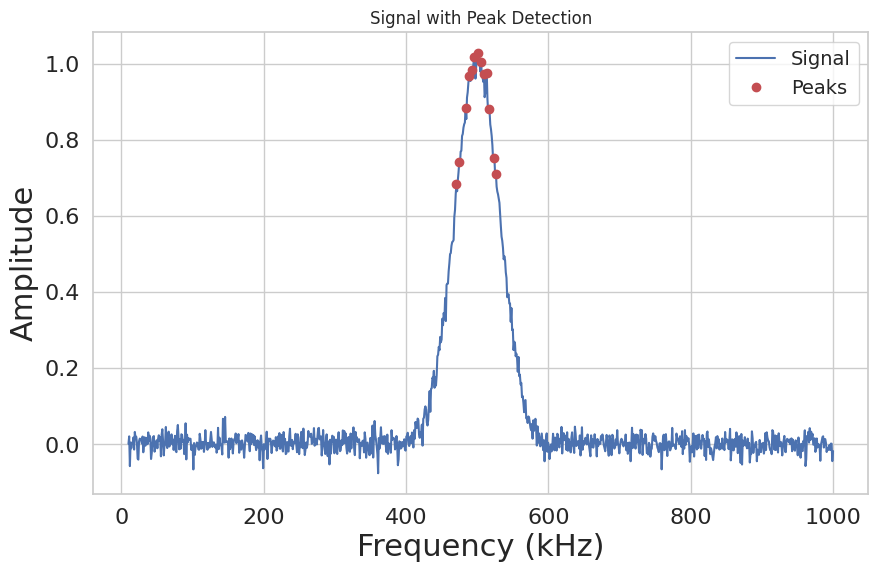

Resonant Frequency: 501.53 kHz
Peak Amplitude: 1.03
Full Width at Half Maximum (FWHM): 74.32 kHz


In [ ]:
from scipy.signal import find_peaks
# Generate some sample data for demonstration (a Gaussian-like peak)
freqs = np.linspace(10, 1000, 1000)  # Frequency range in kHz
amplitude = np.exp(-0.0005 * (freqs - 500) ** 2)  # Gaussian peak centered at 500 kHz
noise = np.random.normal(0, 0.02, amplitude.shape)  # Adding some noise
signal = amplitude + noise

# Find peaks in the data
peaks, _ = find_peaks(signal, height=0.5)  # Finding peaks with a height threshold
peak_freqs = freqs[peaks]  # Extract the frequency at which the peak occurs
peak_amplitudes = signal[peaks]  # Extract the amplitude of the peaks

# Plot the signal with peaks
plt.figure(figsize=(10, 6))
plt.plot(freqs, signal, label='Signal')
plt.plot(peak_freqs, peak_amplitudes, 'ro', label='Peaks')
plt.title('Signal with Peak Detection')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the full width at half maximum (FWHM) for the main peak
main_peak_index = np.argmax(peak_amplitudes)  # Index of the main peak
main_peak_freq = peak_freqs[main_peak_index]  # Frequency of the main peak
main_peak_amplitude = peak_amplitudes[main_peak_index]  # Amplitude of the main peak

# Find the half-maximum points
half_max = main_peak_amplitude / 2
left_idx = np.where(signal[:peaks[main_peak_index]] <= half_max)[0][-1]
right_idx = np.where(signal[peaks[main_peak_index]:] <= half_max)[0][0] + peaks[main_peak_index]
FWHM = freqs[right_idx] - freqs[left_idx]  # Full Width at Half Maximum

# Print the peak characteristics
print(f'Resonant Frequency: {main_peak_freq:.2f} kHz')
print(f'Peak Amplitude: {main_peak_amplitude:.2f}')
print(f'Full Width at Half Maximum (FWHM): {FWHM:.2f} kHz')


### Resonant Frequency, Peak Amplitude, and Full Width at Half Maximum (FWHM)

In signal analysis, especially for impedance spectroscopy or wave phenomena, several important peak characteristics are used to describe the behavior of the system. These include the **resonant frequency**, **peak amplitude**, and **full width at half maximum (FWHM)**.

#### 1. Resonant Frequency \( f_r \):
The **resonant frequency** is the frequency at which the system exhibits a peak in response due to resonance. It is the frequency where the impedance is minimized in mechanical systems or maximized in electrical systems. The resonant frequency \( f_r \) is detected by finding the position of the peak in the frequency spectrum:

$$
f_r = f_{\text{peak}}
$$

Where:
- \( f_r \) is the resonant frequency,
- \( f_{\text{peak}} \) is the frequency at which the peak occurs.

#### 2. Peak Amplitude \( A_{\text{peak}} \):
The **peak amplitude** corresponds to the maximum value of the signal at the resonant frequency. It represents the magnitude of the system's response at resonance:

$$
A_{\text{peak}} = \text{max}(A(f))
$$

Where:
- \( A_{\text{peak}} \) is the peak amplitude,
- \( A(f) \) is the amplitude of the signal as a function of frequency.

#### 3. Full Width at Half Maximum (FWHM):
The **full width at half maximum (FWHM)** describes the width of the peak at half of the peak's maximum amplitude. It is a measure of how sharp or broad the peak is. A smaller FWHM indicates a sharper peak and a more selective resonance. FWHM is defined as:

$$
\text{FWHM} = f_{\text{right}} - f_{\text{left}}
$$

Where:
- \( f_{\text{left}} \) is the frequency at which the amplitude first reaches half of the peak's maximum value on the left side of the peak,
- \( f_{\text{right}} \) is the frequency at which the amplitude reaches half of the peak's maximum value on the right side of the peak.

#### 4. Quality Factor \( Q \):
The **quality factor (Q)** of a resonant system is a dimensionless measure of how sharp the resonance is. It is defined as the ratio of the resonant frequency to the full width at half maximum (FWHM):

$$
Q = \frac{f_r}{\text{FWHM}}
$$

A higher \( Q \) value indicates a narrower, sharper peak, representing a more efficient resonance.

### Summary:
- **Resonant frequency** \( f_r \) is the frequency at which the system exhibits the strongest response.
- **Peak amplitude** \( A_{\text{peak}} \) is the maximum signal response at the resonant frequency.
- **FWHM** describes the width of the peak at half of the maximum amplitude, indicating how sharp the peak is.
- **Quality factor** \( Q \) is the ratio of the resonant frequency to the FWHM, describing the sharpness of the peak.


# Gaussian Filter and Its Application in Data Smoothing

A **Gaussian Filter** is a type of linear filter used to smooth signals or images by reducing noise or fine details. The filter applies a Gaussian function to the data, giving more weight to nearby points and less weight to points farther away, based on their distance from the central point.

The Gaussian function is defined as:

$$
G(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{x^2}{2 \sigma^2}}
$$

Where:
- $G(x)$ is the Gaussian function applied to the data,
- $\sigma$ is the standard deviation of the Gaussian kernel, controlling the width of the filter.

### Purpose of Gaussian Filter

In signal processing, the Gaussian filter is commonly used to:
- **Reduce high-frequency noise** while preserving the important low-frequency signal components.
- **Smooth the data**, making trends easier to observe by reducing fluctuations caused by random noise.

The amount of smoothing applied by the Gaussian filter depends on the value of $\sigma$:
- A smaller $\sigma$ results in less smoothing, preserving more of the original data details.
- A larger $\sigma$ leads to stronger smoothing, which may eliminate noise but can also blur important features of the signal.

### Gaussian Filter in Code

In the context of Python, the **Gaussian Filter** is often applied using libraries such as `scipy.ndimage`. The following example shows how the filter is applied:

$$
\text{phase_filtered_smoothed} = \text{gaussian_filter}(\text{phase_filtered}, \sigma=2)
$$

Where:
- `phase_filtered` is the original signal (phase angle data in this case),
- `gaussian_filter()` applies the Gaussian filter to smooth the signal,
- $\sigma = 2$ is the standard deviation of the Gaussian kernel, determining the degree of smoothing.

### Key Parameters

- **Standard Deviation $\sigma$**: Controls the amount of smoothing. A larger $\sigma$ results in a smoother output, but can also reduce the sharpness of peaks and other fine details.
- **Frequency Range**: In many applications, a specific frequency range is targeted to ensure that the smoothing is applied only to relevant portions of the data.

By adjusting $\sigma$, you can control the trade-off between noise reduction and signal fidelity, depending on the characteristics of the data you are analyzing.


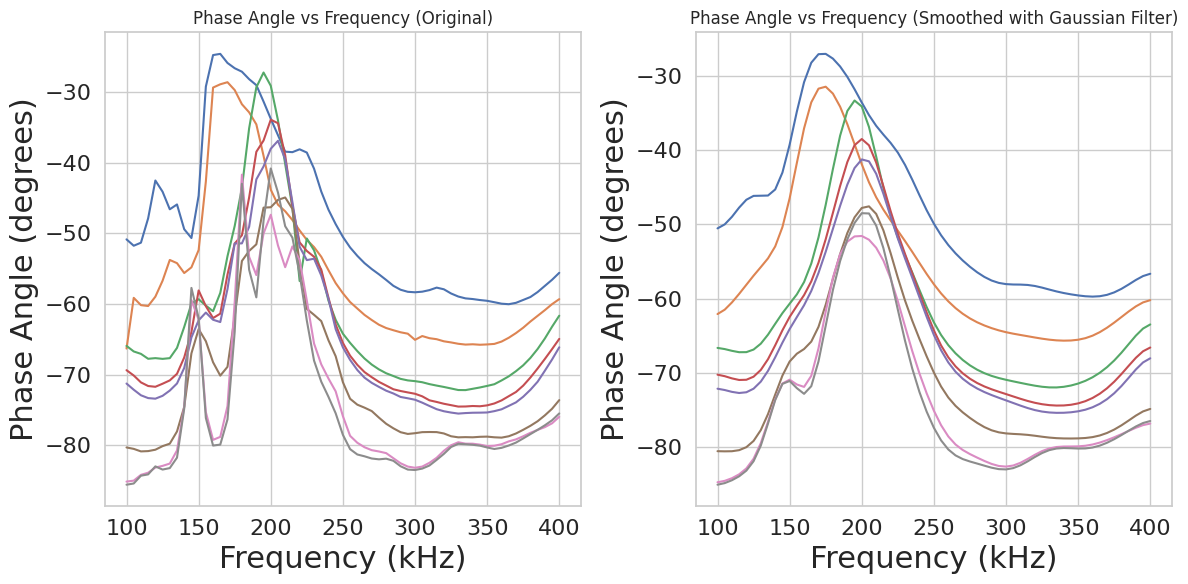

In [ ]:
from scipy.ndimage import gaussian_filter

# Define the folder and file paths
EMI_folder = 'Data/EMI-piezo/'
EMI_paths = ['01-4h.csv', '02-6h.csv', '03-8h.csv', '04-10h.csv', '05-12h.csv', '06-1d.csv', '07-3d.csv', '08-7d.csv']

# Define the desired frequency range (in kHz)
start_freq_kHz = 10  # Start frequency (kHz)
end_freq_kHz = 400  # End frequency (kHz)

# Initialize figure for before and after Gaussian filtering
plt.figure(figsize=(12, 6))

# Loop through the file paths for phase angle data and Gaussian filter application
for i, file_name in enumerate(EMI_paths):
    temp_path = EMI_folder + file_name
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data = temp_data.astype(float)  # Ensure all data is float type

    # Extract columns
    col = temp_data.columns
    Freq_MHz = np.array(temp_data[col[0]])  # Frequency in MHz
    Freq_kHz = Freq_MHz * 1000  # Convert frequency from MHz to kHz

    phase_EMI = np.array(temp_data[col[5]])  # Phase angle of impedance

    # Find the indices that correspond to the desired frequency range
    freq_mask = (Freq_kHz >= start_freq_kHz) & (Freq_kHz <= end_freq_kHz)

    # Apply the mask to filter the data within the specified frequency range
    Freq_filtered = Freq_kHz[freq_mask]
    phase_filtered = phase_EMI[freq_mask]

    # Apply Gaussian filter
    sigma = 2  # Standard deviation for the Gaussian kernel
    phase_filtered_smoothed = gaussian_filter(phase_filtered, sigma=sigma)

    # Plot original phase angle data (before filtering)
    plt.subplot(1, 2, 1)
    plt.plot(Freq_filtered, phase_filtered, label=f'Original Phase (File {file_name})')

    # Plot Gaussian-filtered phase angle data
    plt.subplot(1, 2, 2)
    plt.plot(Freq_filtered, phase_filtered_smoothed, label=f'Smoothed Phase (File {file_name})')

# Customize the plot for phase angle (before filtering)
plt.subplot(1, 2, 1)
plt.title('Phase Angle vs Frequency (Original)')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Phase Angle (degrees)')
plt.grid(True)

# Customize the plot for phase angle (after Gaussian filtering)
plt.subplot(1, 2, 2)
plt.title('Phase Angle vs Frequency (Smoothed with Gaussian Filter)')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Phase Angle (degrees)')
plt.grid(True)

plt.tight_layout()
plt.show()


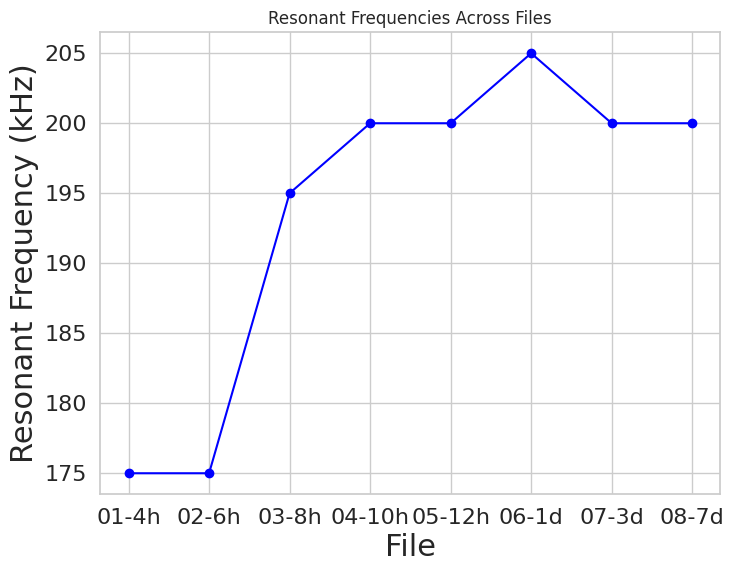

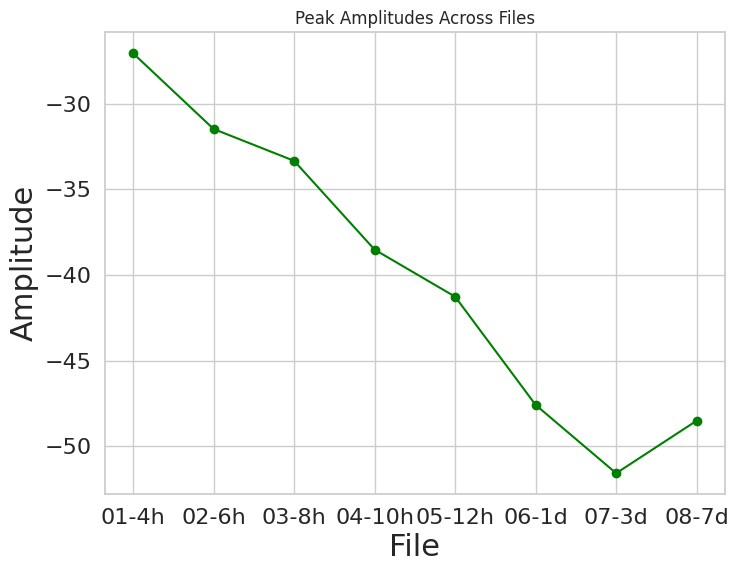

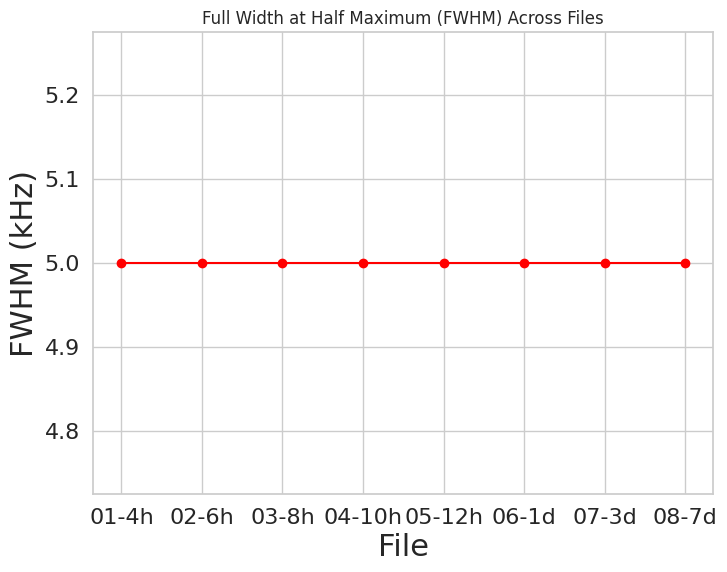

In [ ]:
from scipy.signal import find_peaks

# Define the folder and file paths
EMI_folder = 'Data/EMI-piezo/'
EMI_paths = ['01-4h.csv', '02-6h.csv', '03-8h.csv', '04-10h.csv', '05-12h.csv', '06-1d.csv', '07-3d.csv', '08-7d.csv']

# Define the desired frequency range (in kHz)
start_freq_kHz = 10  # Start frequency (kHz)
end_freq_kHz = 400  # End frequency (kHz)

# Initialize lists to store resonant peaks, amplitudes, and FWHM values
resonant_frequencies = []
peak_amplitudes = []
fwhm_values = []

# Track file labels for plotting
file_labels = [path.split('.')[0] for path in EMI_paths]

# Loop through the file paths for phase angle data and Gaussian filter application
for i, file_name in enumerate(EMI_paths):
    temp_path = EMI_folder + file_name
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data = temp_data.astype(float)  # Ensure all data is float type

    # Extract columns
    col = temp_data.columns
    Freq_MHz = np.array(temp_data[col[0]])  # Frequency in MHz
    Freq_kHz = Freq_MHz * 1000  # Convert frequency from MHz to kHz

    phase_EMI = np.array(temp_data[col[5]])  # Phase angle of impedance

    # Find the indices that correspond to the desired frequency range
    freq_mask = (Freq_kHz >= start_freq_kHz) & (Freq_kHz <= end_freq_kHz)

    # Apply the mask to filter the data within the specified frequency range
    Freq_filtered = Freq_kHz[freq_mask]
    phase_filtered = phase_EMI[freq_mask]

    # Apply Gaussian filter
    sigma = 2  # Standard deviation for the Gaussian kernel
    phase_filtered_smoothed = gaussian_filter(phase_filtered, sigma=sigma)

    # Find peaks in the smoothed phase data, with a height restriction greater than -60
    peaks, properties = find_peaks(phase_filtered_smoothed, height=-60)  # Finding all peaks above -60
    peak_freqs = Freq_filtered[peaks]  # Frequencies of peaks
    peak_heights = properties['peak_heights']  # Amplitudes of the peaks

    if len(peaks) > 0:
        # Take the first peak as the resonant peak (for demonstration purposes)
        resonant_freq = peak_freqs[0]
        peak_amplitude = peak_heights[0]

        # Calculate FWHM (Full Width at Half Maximum)
        half_max = peak_amplitude / 2
        left_idx = np.where(phase_filtered_smoothed[:peaks[0]] <= half_max)[0][-1]
        right_idx = np.where(phase_filtered_smoothed[peaks[0]:] <= half_max)[0][0] + peaks[0]
        fwhm = Freq_filtered[right_idx] - Freq_filtered[left_idx]

        # Store the results
        resonant_frequencies.append(resonant_freq)
        peak_amplitudes.append(peak_amplitude)
        fwhm_values.append(fwhm)

# Plot resonant frequencies
plt.figure(figsize=(8, 6))
plt.plot(file_labels, resonant_frequencies, marker='o', linestyle='-', color='blue')
plt.title('Resonant Frequencies Across Files')
plt.xlabel('File')
plt.ylabel('Resonant Frequency (kHz)')
plt.grid(True)
plt.show()

# Plot peak amplitudes
plt.figure(figsize=(8, 6))
plt.plot(file_labels, peak_amplitudes, marker='o', linestyle='-', color='green')
plt.title('Peak Amplitudes Across Files')
plt.xlabel('File')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plot FWHM (Full Width at Half Maximum)
plt.figure(figsize=(8, 6))
plt.plot(file_labels, fwhm_values, marker='o', linestyle='-', color='red')
plt.title('Full Width at Half Maximum (FWHM) Across Files')
plt.xlabel('File')
plt.ylabel('FWHM (kHz)')
plt.grid(True)
plt.show()

In [ ]:
#wavelet
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.8 MB/s eta 0:00:00


# Wavelet Transform for Data Analysis

The **Wavelet Transform (WT)** is a powerful tool used to analyze non-stationary signals that contain both low- and high-frequency components. Unlike the Fourier Transform, which only provides global frequency information, the Wavelet Transform can provide both time and frequency localization, making it ideal for analyzing signals with transient characteristics.

## Continuous Wavelet Transform (CWT)

The **Continuous Wavelet Transform (CWT)** decomposes a signal into different frequency components while preserving time information. The CWT is defined as:

$$
C(a, b) = \int_{-\infty}^{+\infty} x(t) \psi^* \left( \frac{t - b}{a} \right) dt
$$

Where:
- $C(a, b)$ are the wavelet coefficients,
- $x(t)$ is the signal to be analyzed,
- $\psi(t)$ is the mother wavelet (such as the Mexican hat or Morlet wavelet),
- $a$ is the scale parameter, controlling the frequency resolution,
- $b$ is the translation parameter, controlling the time localization,
- $\psi^*$ is the complex conjugate of the wavelet function.

### Scale and Frequency

In the Wavelet Transform, the **scale** $a$ is inversely related to frequency. Smaller scales correspond to higher frequencies, allowing the analysis of short-term, high-frequency phenomena. Larger scales correspond to lower frequencies, making it possible to detect long-term trends and low-frequency components in the signal.

### Application of CWT in Phase Angle Analysis

In the analysis of impedance spectroscopy data, the **phase angle** signal contains both low- and high-frequency information that changes over time. By applying the CWT, we can:
- Detect transient events or changes in frequency,
- Analyze how different frequency components of the signal vary over time,
- Reveal local trends and identify anomalies that are not visible with other signal processing techniques.

In this analysis, the CWT was applied using the **Mexican hat wavelet** (`'mexh'`), which is commonly used for detecting peaks and transient events. The resulting **wavelet coefficients** are visualized as a heatmap, where the color intensity represents the magnitude of the wavelet coefficients at different scales and frequencies.

### Advantages of Wavelet Transform

- **Time-Frequency Localization**: Wavelet Transform provides both time and frequency information, making it ideal for analyzing non-stationary signals.
- **Multi-Resolution Analysis**: By using different scales, we can analyze both short-term high-frequency components and long-term low-frequency trends in the same signal.

Wavelet Transform is widely used in fields such as signal processing, seismic analysis, and biomedical engineering, providing insights that are not possible with traditional Fourier-based methods.

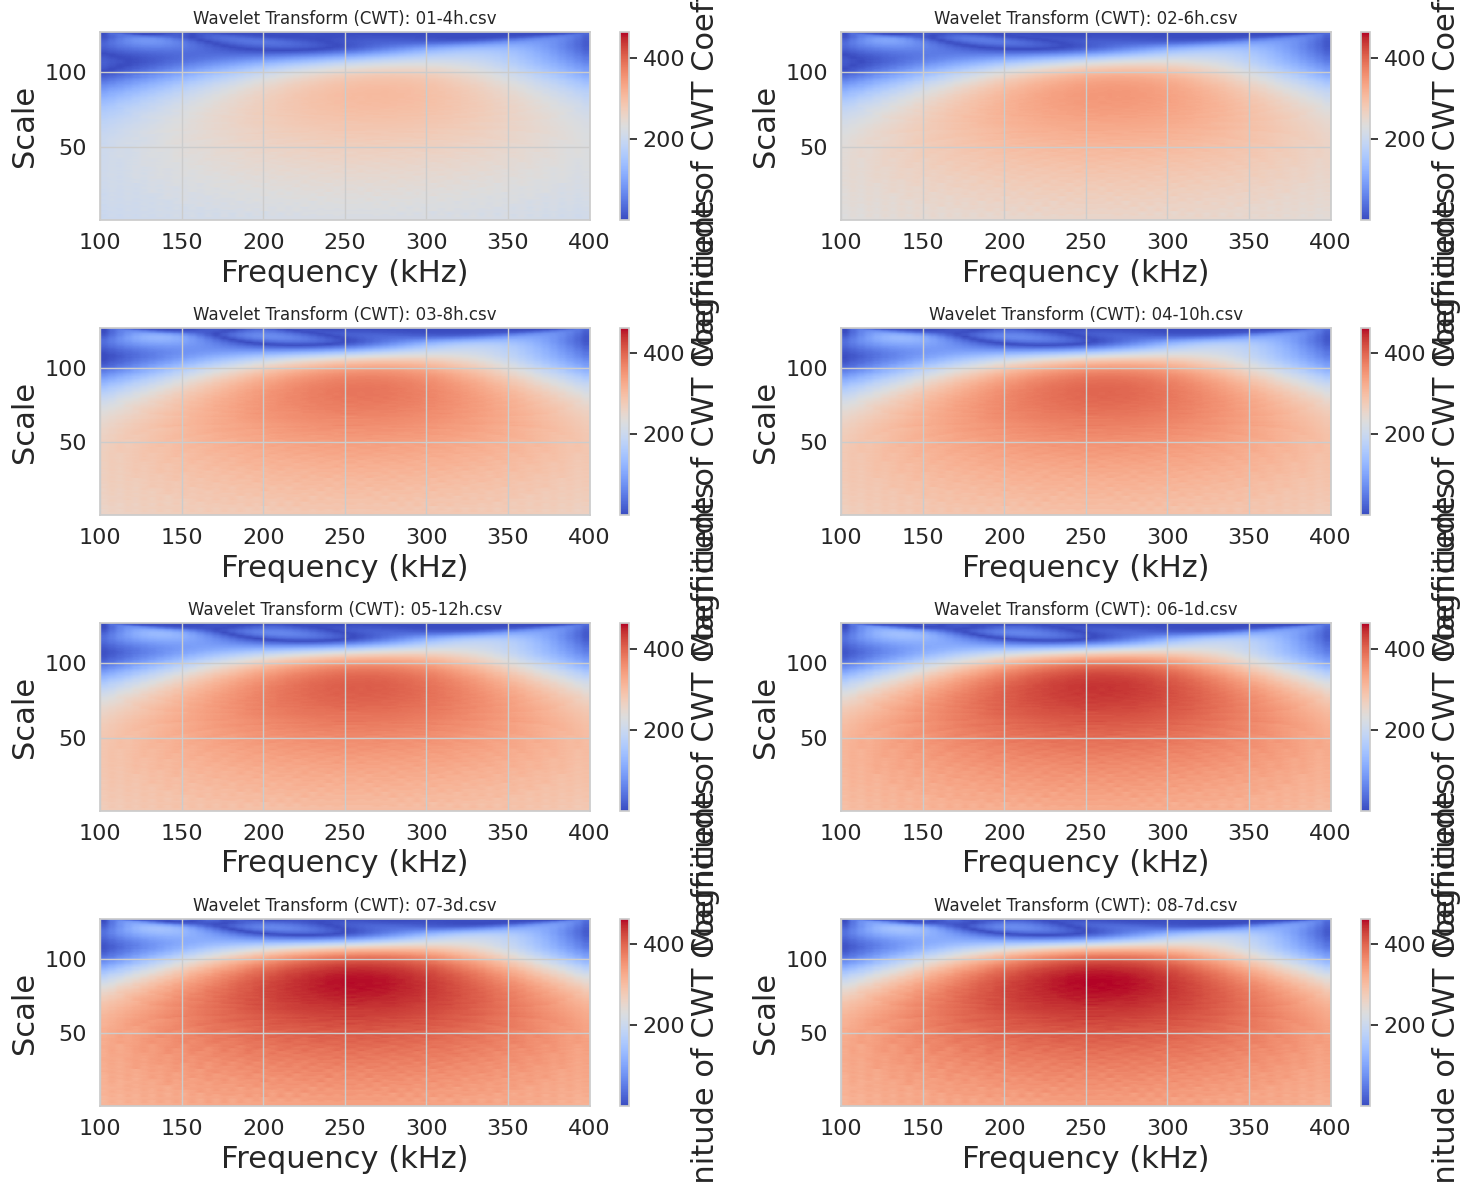

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define the folder and file paths
EMI_folder = 'Data/EMI-piezo/'
EMI_paths = ['01-4h.csv', '02-6h.csv', '03-8h.csv', '04-10h.csv', '05-12h.csv', '06-1d.csv', '07-3d.csv', '08-7d.csv']

# Define the desired frequency range (in kHz)
start_freq_kHz = 10  # Start frequency (kHz)
end_freq_kHz = 400  # End frequency (kHz)

# Store all coefficients to find the global min/max for color scale
all_coefficients = []

# First loop: process all files and store the coefficients
for i, file_name in enumerate(EMI_paths):
    temp_path = EMI_folder + file_name
    temp_data = pd.read_csv(temp_path, skiprows=4)
    temp_data = temp_data.astype(float)  # Ensure all data is float type

    # Extract columns
    col = temp_data.columns
    Freq_MHz = np.array(temp_data[col[0]])  # Frequency in MHz
    Freq_kHz = Freq_MHz * 1000  # Convert frequency from MHz to kHz

    phase_EMI = np.array(temp_data[col[5]])  # Phase angle of impedance

    # Find the indices that correspond to the desired frequency range
    freq_mask = (Freq_kHz >= start_freq_kHz) & (Freq_kHz <= end_freq_kHz)

    # Apply the mask to filter the data within the specified frequency range
    Freq_filtered = Freq_kHz[freq_mask]
    phase_filtered = phase_EMI[freq_mask]

    # Perform continuous wavelet transform (CWT) using the 'mexh' (Mexican hat) wavelet
    scales = np.arange(1, 128)
    coefficients, _ = pywt.cwt(phase_filtered, scales, 'mexh')

    # Store coefficients for finding global min/max later
    all_coefficients.append(np.abs(coefficients))

# Find the global color scale limits (min and max of all coefficients)
global_min = np.min([np.min(coeff) for coeff in all_coefficients])
global_max = np.max([np.max(coeff) for coeff in all_coefficients])

# Second loop: plot all files in one figure with shared color scale
plt.figure(figsize=(15, 12))

for i, file_name in enumerate(EMI_paths):
    plt.subplot(4, 2, i+1)  # Create a 4x2 grid of subplots

    Freq_MHz = np.array(temp_data[col[0]])  # Frequency in MHz
    Freq_kHz = Freq_MHz * 1000  # Convert frequency from MHz to kHz

    # Retrieve the coefficients from the first loop
    coefficients = all_coefficients[i]

    # Plot the wavelet coefficients
    plt.imshow(np.abs(coefficients), extent=[Freq_filtered.min(), Freq_filtered.max(), scales.min(), scales.max()],
               cmap='coolwarm', aspect='auto', vmin=global_min, vmax=global_max)  # Use global min/max for color scale
    plt.colorbar(label='Magnitude of CWT Coefficients')
    plt.title(f'Wavelet Transform (CWT): {file_name}')
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Scale')

plt.tight_layout()
plt.show()
